# The Python ecosystem - The statsmodels library

[statsmodels](http://www.statsmodels.org/dev/index.html#) is a Python module that provides classes and functions for the estimation of many different **statistical models**, as well as for conducting **statistical tests**, and **statistical data exploration**.


* Regression Analsyis
* Linear Mixed Effects Models
* ANOVA
* Time Series analysis
* Parametric and Nonparametric Statistical Methods
* Multivariate Statistics multivariate
* Distributions
* and many more...




**Add the `src` directory as one where we can import modules**

In [1]:
import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'src'))
sys.path.append(src_dir)
print(src_dir)

C:\Users\josi\Documents\workshop-data-science\src


In [2]:
import helper_funcs as hf

**Load libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

## Population and Sample Statistics

[Inferential statistics](https://en.wikipedia.org/wiki/Statistical_inference) is all about using **sample results** to make decisions or predictions about a **population**. Basically, a numerical value is assigned to a population parameter based on the information collected from a sample.

**Load the data set**

Source [Crowder, M. and Hand, D. (1990)](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/ChickWeight.html)

In [4]:
chicken, chick_diet1, chick_diet2, chick_diet3, chick_diet4 = hf.load_chicken()

In [5]:
chicken

,Chick,Diet,weight
0,1,1,112
1,2,1,120
2,3,1,116
3,4,1,99
4,5,1,127
5,6,1,114
6,7,1,150
7,8,1,92
8,9,1,81
9,10,1,83


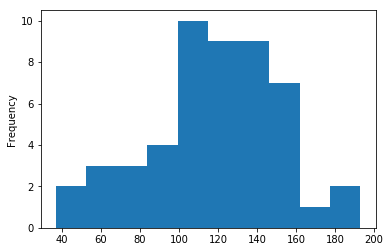

In [6]:
chicken["weight"].plot.hist();

## Point Estimate and Confidence Intervall

Given a sample, the value of the computed sample statistic gives a point estimate of the corresponding population parameter. For example, the sample mean $(\bar x)$, is a point estimate of the corresponding population mean, $\mu$, or the sample standard deviation $s$ is a point estimate for the population standard deviation $\sigma$. 

* [__sampling error__](https://en.wikipedia.org/wiki/Sampling_error) (the point estimate almost always differs from the true value of the population)


### Intervall Estimate 

Instead of assigning a single value to a population parameter, an interval estimation gives a probabilistic statement, relating the given interval to the probability that this interval actually contains the true (unknown) population parameter.


The level of confidence is chosen a priori and thus depends on the users preferences. It is denoted by

$$100(1-\alpha)$$

Although any value of confidence level can be chosen, the most common values are 90%, 95%, and 99%. When expressed as probability, the confidence level is called the confidence coefficient and is denoted by (1−$\alpha$). Most common confidence coefficients are 0.90, 0.95, and 0.99, respectively.

A 100(1−$\alpha$)% confidence interval is an interval estimate around a population parameter $\theta$ (here, the Greek letter $\theta$ is a placeholder for any population parameter of interest such as the mean $\mu$, or the standard deviation $\sigma$, among others) that, under repeated random samples of size N, is expected to include $\theta$'s true value 100(1−$\alpha$)%  of the time ([Lovric 2010](http://www.springer.com/de/book/9783642048975)).

The actual number added to and subtracted from the point estimate is called the margin of error.

$$CI:\text{Point estimate} \pm \text{Margin of error (ME)}$$


Thus, the margin of error (ME) is expressed as


$$ME = z^*_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}$$

In [7]:
from statsmodels.stats.weightstats import DescrStatsW
d_stats = DescrStatsW(chicken["weight"])

In [8]:
d_mean = d_stats.mean
d_mean

119.28

In [9]:
alpha = 0.05
d_conf_int = d_stats.tconfint_mean(alpha=alpha) 
print(d_conf_int)

(109.88771007746364, 128.67228992253638)


In [10]:
sig_level = int((1-alpha)*100)
lower_ci = np.round(d_conf_int[0],1)
upper_ci = np.round(d_conf_int[1],1)

(print("We are {}% confident that the true weight of chicken is between {} and {} gramm.".
       format(sig_level, lower_ci, upper_ci)))

We are 95% confident that the true weight of chicken is between 109.9 and 128.7 gramm.


## Hypothesis Testing

In [11]:
chicken.groupby("Diet")["weight"].mean() 

Diet
1     98.05
2    122.50
3    143.00
4    134.80
Name: weight, dtype: float64

In [12]:
def compute_ci(df, group, var, alpha=0.05):
    groups = df[group].unique()
    rv = pd.DataFrame({"group":None, 
                       "mean":None,
                       "lower_ci":None,
                       "upper_ci":None}, 
                      index=range(len(groups)))
    for e, g in enumerate(groups):        
        stats = DescrStatsW(df.loc[df[group] == g, var])
        group_mean = stats.mean
        group_ci = stats.tconfint_mean(alpha=alpha) 
        rv.loc[e] = {"group":g, 
                     "mean":group_mean,
                     "lower_ci":group_ci[0],
                     "upper_ci":group_ci[1]}
    return rv
        
group_stats = compute_ci(df=chicken, group="Diet", var="weight")    
group_stats

,group,lower_ci,mean,upper_ci
0,1,83.4971,98.05,112.603
1,2,100.034,122.5,144.966
2,3,123.427,143,162.573
3,4,123.168,134.8,146.432


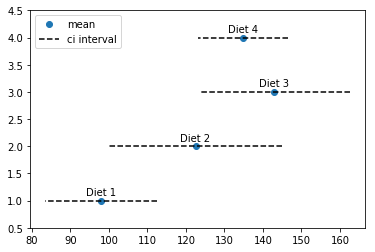

In [13]:
groups = group_stats["group"].values

fig, ax = plt.subplots()
ax.plot(group_stats["mean"].values, groups, "o")
ax.set_ylim(0.5,4.5)

for e,i in enumerate(group_stats["group"]):
    mean = group_stats["mean"].values[e]
    upper = group_stats["upper_ci"].values[e]
    lower = group_stats["lower_ci"].values[e]
    ax.plot((upper, lower),
            (i,i), "k--")
    ax.text(mean,i+0.1, "Diet "+str(int(i)), horizontalalignment='center')
ax.legend(["mean", "ci interval"]);

A very common problem that scientists face is the assessment of significance in scattered statistical data. Owing to the limited availability of observational data, scientists apply **inferential statistical methods to decide if the observed data contains significant information or if the scattered data is nothing more than the manifestation of the inherently probabilistic nature of the data generation process**.

The framework of hypothesis testing is all about making statistical inferences about populations based on samples taken from the population. Any hypothesis test involves the **collection of data (sampling)**. If the **hypothesis** is assumed to be correct, the scientist can calculate the **expected results** of an experiment. If the **observed data** differs significantly from the expected results, then one considers the assumption to be incorrect. Thus, based on the observed data the scientist makes a **decision** as to whether or not there is sufficient evidence, based upon analyses of the data, that the model - the hypothesis - should be rejected, or that there is not sufficient evidence to reject the stated hypothesis.

### Testing for differences in the mean (t-test)

* variables normally distribiuted and independant
* variance equal or not



Null hypothesis
$H_0:\quad \mu_1 = \mu_2$

Alternative hypothesis
$H_A:\quad \mu_1 \ne \mu_2$


In [14]:
from statsmodels.stats.weightstats import ttest_ind

In [15]:
t, p, degf = ttest_ind(chick_diet2, chick_diet3)
p

0.13702894396508203

## Multiple comparisons

The problem with multiple comparisons is that the more hypotheses are tested on a particular data set, the more likely it is to incorrectly reject the null hypothesis. Thus, methods of multiple comparison require a higher significance threshold ($\alpha$) for individual comparisons, in order to compensate for the number of inferences being made.


**The Family-wise error rate**

The family-wise error rate is the probability of making one or more false discoveries, or [__Type I errors__]() when performing multiple hypotheses tests.

Recall that at a significance level of $\alpha=0.05$, the probability of making a Type I error is equal to $0.05$ or $5\%$. Consequently, the probability of not making a Type I error is $1-\alpha=1-0.05=0.95$.


Written more formally, for a family of $C$ tests, the probability of making a Type I error for the whole family is

$$(1-\alpha)^C\text{.}$$

Let us now consider $C=4$ and $\alpha=0.05$.

Thus, if we make 4 multiple comparisons on one data set, the probability of not making one or more Type I errors on the family of tests is $(1-\alpha)^C = (1−0.05)^4 = 0.81$


Null hypothesis
$H_0:\quad \mu_1 = \mu_2 = \mu_3 = \mu_4$

Alternative hypothesis
$H_A:\quad \mu_1 \ne \mu_2 \ne \mu_3 \ne \mu_4$


**[Tukey's HSD (Honestly Significant Difference)](https://en.wikipedia.org/wiki/Tukey%27s_range_test)**

In [16]:
from statsmodels.sandbox.stats.multicomp import MultiComparison
mult_comp = MultiComparison(data=chicken["weight"], groups=chicken["Diet"])
mult_comp.tukeyhsd(alpha=0.05).summary()

group1,group2,meandiff,lower,upper,reject
1,2,24.45,-4.5779,53.4779,False
1,3,44.95,15.9221,73.9779,True
1,4,36.75,7.7221,65.7779,True
2,3,20.5,-13.0186,54.0186,False
2,4,12.3,-21.2186,45.8186,False
3,4,-8.2,-41.7186,25.3186,False


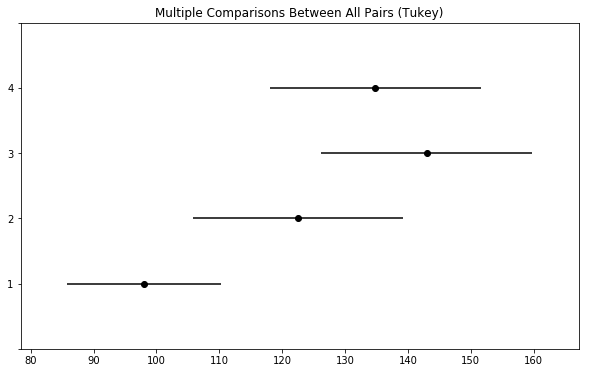

In [17]:
_ = mult_comp.tukeyhsd(alpha=0.05).plot_simultaneous()